In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

In [1]:
import pandas as pd

# 读入 CSV 文件
df = pd.read_csv('evaluate_algorithmic#.csv')
# df = pd.read_csv('evaluate_seg.csv')

df = df.drop(columns=['pbid'])
df = df[df['ARG'] <= 100000]
# df = df[df['classcial'] <= 500]
# df = df[df['in_constraints_probs'] >= 99]
grouped_df = df.groupby(['pkid', 'layers', 'variables', 'constraints', 'method'], as_index=False).agg({
    'iteration_count':'mean',
    'classcial':'mean',
    'quantum':'mean',
    'run_times':'mean',
    "ARG": 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
})

## 分组并把组作为索引
pivot_df = grouped_df.pivot(index =['pkid','variables','constraints'], columns='method', values=["ARG", 'best_solution_probs', 'quantum', 'classcial', 'run_times','iteration_count'])
# pivot_df = grouped_df.pivot(index =['pkid','variables','constraints'], columns='method', values=['best_solution_probs','in_constraints_probs',"ARG",'iteration_count'])

method_order = ['ChocoSolver', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver']
# method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSolver ', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver', 'QtoSimplifyDiscardSegmentedSolver']
# method_order = ['ChocoSolver', 'QtoSolver', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver']
# method_order = ['ChocoSolver']
# method_order = ['QtoSimplifyDiscardSegmentedSolver']
pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([['classcial', 'quantum', "ARG",'best_solution_probs','run_times','iteration_count'], method_order]))

pivot_df

classcial                    \
                           ChocoSolver QtoSimplifySolver   
pkid variables constraints                                 
0    6         3              1.597037          0.848695   
1    15        8              8.880065          9.357230   
2    21        12            19.523182         27.663566   
3    28        15            49.657212        140.267882   
4    12        6              5.567581          3.283865   
5    15        9              4.345839          4.031243   
6    20        8             41.508185         19.447479   
7    24        12            23.985061         25.058704   
8    8         6              3.215557          1.705319   
9    15        8              6.705457          6.139320   
10   18        9             25.733619         35.688215   
11   21        10            39.340956         79.662835   
12   7         4              2.101640          1.442101   
13   10        5              4.011185          3.380885   
14   14        6             13.756049         16.301474   
15   18        7             20.118872         31.172483   
16   9         4              6.445752          6.483612   
17   12        5             21.572744         23.102136   
18   16        6             78.492792        172.242347   
19   20        7            224.996641        742.108444   

                                                        quantum  \
                           QtoSimplifyDiscardSolver ChocoSolver   
pkid variables constraints                                        
0    6         3                           0.458892    6.312009   
1    15        8                          10.442838   10.351390   
2    21        12                         32.509968   16.302587   
3    28        15                        249.074338  100.564416   
4    12        6                           3.331490   17.187273   
5    15        9                           2.602164   16.521518   
6    20        8                          18.538337   35.197559   
7    24        12                         16.287574   28.985962   
8    8         6                           1.552051   15.808217   
9    15        8                           3.891646   16.519698   
10   18        9                          38.113145   19.674990   
11   21        10                         84.261515   25.793257   
12   7         4                           1.187754   12.130278   
13   10        5                           2.679222   12.653520   
14   14        6                          15.770074   14.259498   
15   18        7                          29.098908   21.425261   
16   9         4                           5.890366   11.821455   
17   12        5                          19.053089   12.400165   
18   16        6                         147.874606   26.469056   
19   20        7                         687.525553  139.256732   

                                                                       \
                           QtoSimplifySolver QtoSimplifyDiscardSolver   
pkid variables constraints                                              
0    6         3                    6.705475                 1.657336   
1    15        8                   10.888927                 8.041011   
2    21        12                  25.221763                19.233588   
3    28        15                 269.984315               266.407068   
4    12        6                   16.429348                12.585194   
5    15        9                   16.393849                11.199003   
6    20        8                   19.212029                14.287975   
7    24        12                  26.573472                14.969335   
8    8         6                   14.525710                 7.768722   
9    15        8                   17.464876                13.083993   
10   18        9                   24.501810                18.082583   
11   21        10                  39.821429                32.646026   
12   7     

In [2]:
a = pivot_df[('classcial', 'ChocoSolver')].sum()
b = pivot_df[('classcial', 'QtoSimplifyDiscardSolver')].sum()
c = pivot_df[('classcial', 'ChocoSolver')].mean()
d = pivot_df[('classcial', 'QtoSimplifyDiscardSolver')].mean()
print(f'choco:{c}, qtodiscard:{d}')
print(d/c)


choco:30.07777127330943, qtodiscard:68.50717645168916
2.277667977097805


In [3]:
import pandas as pd

# 读入 CSV 文件
df = pd.read_csv('evaluate_algorithmic#.csv')
# df = pd.read_csv('evaluate_seg.csv')

df2 = pd.read_csv('evaluate#.csv')
extra_data = df2[df2['method'].isin(['PenaltySolver', 'HeaSolver'])]
# 合并Hea和Penalty
df = pd.concat([df, extra_data], ignore_index=True)

df = df.drop(columns=['pbid'])
df = df[df['ARG'] <= 100000]
df['pkid_group'] = df['pkid'] % 4
# df = df[df['classcial'] <= 500]
# df = df[df['in_constraints_probs'] >= 99]
grouped_df = df.groupby(['pkid_group', 'method'], as_index=False).agg({
    'iteration_count':'mean',
    'classcial':'mean',
    'quantum':'mean',
    'run_times':'mean',
    "ARG": 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
})

## 分组并把组作为索引
pivot_df = grouped_df.pivot(index =['pkid_group'], columns='method', values=["ARG", 'quantum', 'best_solution_probs', 'classcial', 'run_times','iteration_count'])
# pivot_df = grouped_df.pivot(index =['pkid','variables','constraints'], columns='method', values=['best_solution_probs','in_constraints_probs',"ARG",'iteration_count'])

method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']
# method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSolver ', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver', 'QtoSimplifyDiscardSegmentedSolver']
# method_order = ['ChocoSolver', 'QtoSolver', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver']
# method_order = ['ChocoSolver']
# method_order = ['QtoSimplifyDiscardSegmentedSolver']
pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([['classcial', 'quantum', "ARG",'best_solution_probs','run_times','iteration_count'], method_order]))

pivot_df

classcial                                                     \
              HeaSolver PenaltySolver ChocoSolver QtoSimplifyDiscardSolver   
pkid_group                                                                   
0            200.264913     65.129629    3.803141                 2.503132   
1            565.966499    183.795465    9.103058                 7.733792   
2            947.889680    350.805699   35.802765                50.561226   
3           1733.772863    602.956687   71.814590               214.028178   

               quantum                                                     \
             HeaSolver PenaltySolver ChocoSolver QtoSimplifyDiscardSolver   
pkid_group                                                                  
0            54.993112     24.181368   12.554227                 7.786192   
1            20.781012      8.933869   13.689258                10.350292   
2            25.255061     11.541515   22.380738                22.412534   
3           187.559325    128.629788   63.430952               104.588989   

                   ARG                ... best_solution_probs  \
             HeaSolver PenaltySolver  ...         ChocoSolver   
pkid_group                            ...                       
0           259.210028    232.232131  ...           76.074823   
1           376.090847    311.724927  ...           36.840625   
2           392.903867    454.273785  ...           20.104883   
3           655.338349    621.204084  ...           11.557038   

                                    run_times                               \
           QtoSimplifyDiscardSolver HeaSolver PenaltySolver    ChocoSolver   
pkid_group                                                                   
0                         82.253468     331.0    124.382857  302301.690722   
1                         50.550586     331.0    117.725714  302710.784000   
2                         38.940820     331.0    117.170569  303173.632000   
3                         16.332566     331.0    120.206250  302110.905433   

                                    iteration_count                            \
           QtoSimplifyDiscardSolver       HeaSolver PenaltySolver ChocoSolver   
pkid_group                                                                      
0                     181897.926531           301.0    112.594286       301.0   
1                     253571.072000           301.0    106.548571       301.0   
2                     297492.480000           301.0    106.006689       301.0   
3                     301647.323944           301.0    103.981250       301.0   

                                     
           QtoSimplifyDiscardSolver  
pkid_group                           
0                        255.369388  
1                        297.208000  
2                        299.682000  
3                        298.325956  

[4 rows x 24 columns]

In [4]:
import pandas as pd

# 读入 CSV 文件
df = pd.read_csv('evaluate_algorithmic#.csv')
# df = pd.read_csv('evaluate_seg.csv')

df2 = pd.read_csv('evaluate#.csv')
extra_data = df2[df2['method'].isin(['PenaltySolver', 'HeaSolver'])]
# 合并Hea和Penalty
df = pd.concat([df, extra_data], ignore_index=True)

df = df.drop(columns=['pbid'])
df = df[df['ARG'] <= 100000]
df['pkid_group'] = df['pkid'] % 4
# df = df[df['classcial'] <= 500]
# df = df[df['in_constraints_probs'] >= 99]




mean_values = df.groupby('method').mean()
mean_values['pkid_group'] = 5
mean_values = mean_values.reset_index()
mean_values
# # 重新将平均值行合并到pivot_df中
df = pd.concat([df, mean_values], axis=0)

grouped_df = df.groupby(['pkid_group', 'method'], as_index=False).agg({
    'iteration_count':'mean',
    'classcial':'mean',
    'run_times':'mean',
    "ARG": 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
})

## 分组并把组作为索引
pivot_df = grouped_df.pivot(index =['pkid_group'], columns='method', values=["ARG", 'best_solution_probs', 'classcial', 'run_times','iteration_count'])
# pivot_df = grouped_df.pivot(index =['pkid','variables','constraints'], columns='method', values=['best_solution_probs','in_constraints_probs',"ARG",'iteration_count'])

method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']

pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([['classcial', "ARG",'best_solution_probs','run_times','iteration_count'], method_order]))
pivot_df


classcial                                                     \
              HeaSolver PenaltySolver ChocoSolver QtoSimplifyDiscardSolver   
pkid_group                                                                   
0            200.264913     65.129629    3.803141                 2.503132   
1            565.966499    183.795465    9.103058                 7.733792   
2            947.889680    350.805699   35.802765                50.561226   
3           1733.772863    602.956687   71.814590               214.028178   
5            605.607345    248.910921   30.267047                68.820356   

                   ARG                                                     \
             HeaSolver PenaltySolver ChocoSolver QtoSimplifyDiscardSolver   
pkid_group                                                                  
0           259.210028    232.232131    0.737244                 0.166090   
1           376.090847    311.724927    2.228870                 0.579266   
2           392.903867    454.273785    5.815783                 1.762608   
3           655.338349    621.204084    6.866752                 5.609914   
5           358.584762    367.217848    3.931718                 2.033441   

           best_solution_probs                            \
                     HeaSolver PenaltySolver ChocoSolver   
pkid_group                                                 
0                     2.538225      2.736049   76.074823   
1                     0.052455      0.218192   36.840625   
2                     0.005744      0.045725   20.104883   
3                     0.000000      0.011597   11.557038   
5                     0.915330      0.905532   35.879360   

                                    run_times                               \
           QtoSimplifyDiscardSolver HeaSolver PenaltySolver    ChocoSolver   
pkid_group                                                                   
0                         82.253468     331.0    124.382857  302301.690722   
1                         50.550586     331.0    117.725714  302710.784000   
2                         38.940820     331.0    117.170569  303173.632000   
3                         16.332566     331.0    120.206250  302110.905433   
5                         46.888368     331.0    119.935289  302577.017154   

                                    iteration_count                            \
           QtoSimplifyDiscardSolver       HeaSolver PenaltySolver ChocoSolver   
pkid_group                                                                      
0                     181897.926531           301.0    112.594286       301.0   
1                     253571.072000           301.0    106.548571       301.0   
2                     297492.480000           301.0    106.006689       301.0   
3                     301647.323944           301.0    103.981250       301.0   
5                     258973.568193           301.0    107.880069       301.0   

                                     
           QtoSimplifyDiscardSolver  
pkid_group                           
0                        255.369388  
1                        297.208000  
2                        299.682000  
3                        298.325956  
5                        287.792652

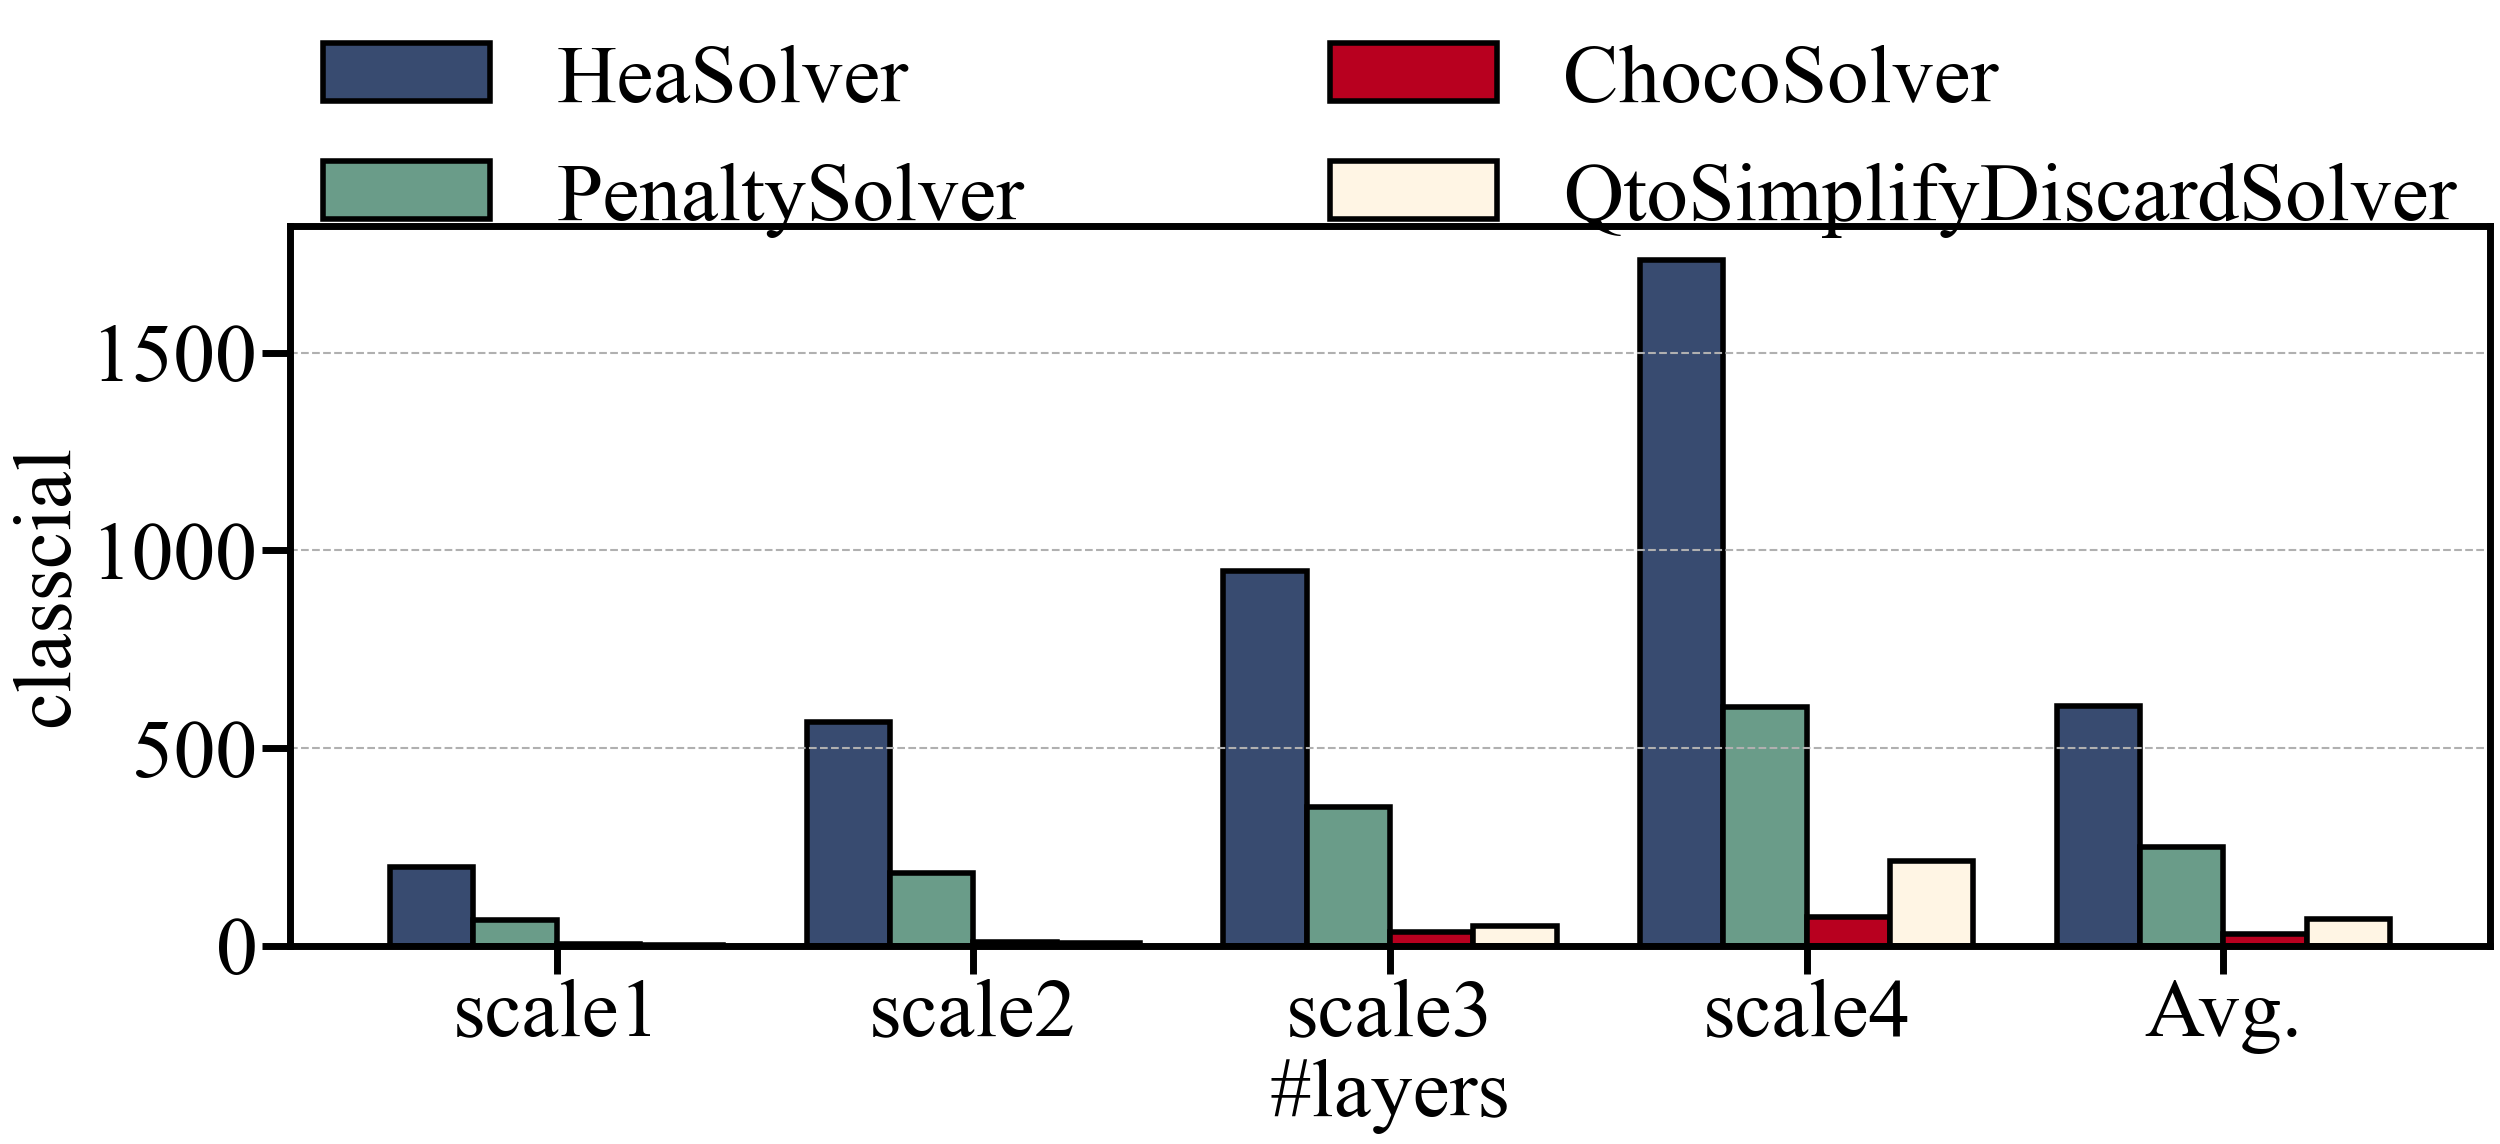

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

ax = plt.axes((0, 0, 1, 0.6))  
bar_width = 0.2
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF']
hatchs = ['','','','','//']

# Plotting loop
for idx, method in enumerate(['HeaSolver', 'PenaltySolver','ChocoSolver', 'QtoSimplifyDiscardSolver']):
    data = grouped_df[grouped_df.method == method]
    x = np.arange(len(data.pkid_group))
    y = data['classcial'].to_list()
    # , hatch=hatchs[idx]
    ax.bar(x + idx * bar_width - (len(data.pkid_group) / 2 - 1) * bar_width, y, width=bar_width, color=colors[idx], label=method, edgecolor="black", linewidth=4)

# Add a horizontal line for reference (e.g., y = 98)
# ax.axhline(y=98, color='orange', linestyle='--', linewidth=3)

# Set grid
ax.grid(True, linestyle='--', linewidth=1.5, axis='y')

# Set the x-axis labels and title
plt.xlabel('#layers')
plt.ylabel('classcial')
plt.xticks(range(5), [f"scale{i + 1}" for i in range(4)]+["Avg."])

# Customizing the legend
plt.legend(loc='upper left', ncol=2, frameon=False, bbox_to_anchor=(0, 1.1, 1, 0.2), mode="expand", borderaxespad=0)

# Save the figure
plt.savefig('classcial_bar_chart_without_error.svg', bbox_inches='tight')
plt.show()


pkid 对应 qc latency

In [6]:
df_quantum = pd.read_csv('quantumtime.csv')
df_quantum = df_quantum.groupby(['pkid', 'method'], as_index=False).agg({
    'latency_all':'mean',
})
df_quantum

,pkid,method,latency_all
0,0,ChocoSolver,3.613505e+05
1,0,HeaSolver,5.262645e+04
2,0,PenaltySolver,4.524850e+04
3,0,QtoSimplifyDiscardSolver,7.352530e+04
4,1,ChocoSolver,4.230858e+06
...,...,...,...
75,18,QtoSimplifyDiscardSolver,7.704263e+05
76,19,ChocoSolver,3.646913e+06
77,19,HeaSolver,6.900377e+04
78,19,PenaltySolver,7.337131e+05


quantum latency

In [7]:
import pandas as pd

# 读入主要的数据文件
df = pd.read_csv('evaluate_algorithmic#.csv')
df2 = pd.read_csv('evaluate#.csv')

# 合并 Hea 和 Penalty 方法的数据
extra_data = df2[df2['method'].isin(['PenaltySolver', 'HeaSolver'])]
df = pd.concat([df, extra_data], ignore_index=True)

# 删除不需要的列，进行筛选
df = df.drop(columns=['pbid'])
df = df[df['ARG'] <= 100000]
df['pkid_group'] = df['pkid'] % 4

# 读取 quantumtime.csv 文件，计算 quantum 时间
df_quantum = pd.read_csv('quantumtime.csv')
# 聚合：对每个 pkid 和 method 计算 'latency_all' 的平均值
df_quantum = df_quantum.groupby(['pkid', 'method'], as_index=False).agg({
    'latency_all': 'mean',
})


# 将时间（单位：纳秒）转换为秒，并乘以 300*1024
df_quantum['quantum'] = (df_quantum['latency_all'] * 300 * 1024) / 1e9  # 转换成秒
# 通过 pkid 和 method 合并到 df 中，使用 suffixes 来避免列名冲突
df = pd.merge(df, df_quantum[['pkid', 'method', 'quantum']], on=['pkid', 'method'], how='left', suffixes=('', '_new'))

# 用合并后的 'quantum_new' 替换原有的 'quantum' 列
df['quantum'] = df['quantum_new']

# 删除合并时新增的 'quantum_new' 列
df.drop(columns=['quantum_new'], inplace=True)

grouped_df = df.groupby(['pkid', 'layers', 'method'], as_index=False).agg({
    'classcial': 'mean',
    'quantum': 'mean',
})
# pivot_df
# values = ["depth", "culled_depth"]
values = ["classcial", "quantum"]

## 分组并把组作为索引
pivot_df = grouped_df.pivot(index =['pkid'], columns='method', values=values)

method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']
# method_order = ['QtoSolver', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver']
pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([values, method_order]))

pivot_df



classcial                                                     \
        HeaSolver PenaltySolver ChocoSolver QtoSimplifyDiscardSolver   
pkid                                                                   
0       25.875957      9.343684    1.597037                 0.458892   
1      488.153929    154.604338    8.880065                10.442838   
2      775.114818    263.455513   19.523182                32.509968   
3     2483.375682    425.566606   49.657212               249.074338   
4      456.923634    143.636033    5.567581                 3.331490   
5      610.383873    208.617761    4.345839                 2.602164   
6     1112.501351    305.935161   41.508185                18.538337   
7     1046.061854   1237.575651   23.985061                16.287574   
8      106.751787     37.329753    3.215557                 1.552051   
9      874.517162    292.471314    6.705457                 3.891646   
10    1377.772007    459.049453   25.733619                38.113145   
11    2383.614431    675.428947   39.340956                84.261515   
12      82.732192     29.296249    2.101640                 1.187754   
13     201.385137     67.540243    4.011185                 2.679222   
14     745.055277    249.021085   13.756049                15.770074   
15    1096.576484    389.172816   20.118872                29.098908   
16     246.771233     83.321972    6.445752                 5.890366   
17     688.787588    200.112500   21.572744                19.053089   
18    1454.685510    523.602696   78.492792               147.874606   
19    2242.027545    811.311657  224.996641               687.525553   

        quantum                                                      
      HeaSolver PenaltySolver  ChocoSolver QtoSimplifyDiscardSolver  
pkid                                                                 
0     16.166846     13.900339   111.006887                22.586971  
1     25.313225     46.433075  1299.719553               589.495053  
2     39.188518     72.064380  3095.830015              2043.902591  
3     29.799853    109.092220  4632.827964              5594.133201  
4     13.133436     90.141808   515.901380               113.028934  
5     25.222797    106.082217  1302.090285               156.762964  
6     21.217455    357.169682   970.040497               208.533051  
7     25.506611    381.710576  2080.733004               372.458455  
8     20.838100     56.525608   335.998146                71.342894  
9     25.588553    127.741242   973.986835               181.885010  
10    39.661218    181.704830  1221.116352               623.291313  
11    39.292371    231.771537  1468.605836               736.207787  
12    21.434674     26.373631   263.480072                52.193580  
13    16.913225     43.283033   531.638288               110.003072  
14    21.762387     85.861401   824.639270               310.193215  
15    39.880349    115.982729  1213.333537               425.348257  
16    18.793977     69.870354   307.809703                55.868533  
17    13.078102    101.873265   423.787168               125.164989  
18    29.548009    164.344332   730.113223               236.674974  
19    21.197958    225.396654  1120.331803               488.869932

In [8]:
import pandas as pd

# 读入主要的数据文件
df = pd.read_csv('evaluate_algorithmic#.csv')
df2 = pd.read_csv('evaluate#.csv')

# 合并 Hea 和 Penalty 方法的数据
extra_data = df2[df2['method'].isin(['PenaltySolver', 'HeaSolver'])]
df = pd.concat([df, extra_data], ignore_index=True)

# 删除不需要的列，进行筛选
df = df.drop(columns=['pbid'])
df = df[df['ARG'] <= 100000]
df['pkid_group'] = df['pkid'] % 4

# 读取 quantumtime.csv 文件，计算 quantum 时间
df_quantum = pd.read_csv('quantumtime.csv')
# 聚合：对每个 pkid 和 method 计算 'latency_all' 的平均值
df_quantum = df_quantum.groupby(['pkid', 'method'], as_index=False).agg({
    'latency_all': 'mean',
})


# 将时间（单位：纳秒）转换为秒，并乘以 300*1024
df_quantum['quantum'] = (df_quantum['latency_all'] * 300 * 1024) / 1e9  # 转换成秒
# 通过 pkid 和 method 合并到 df 中，使用 suffixes 来避免列名冲突
df = pd.merge(df, df_quantum[['pkid', 'method', 'quantum']], on=['pkid', 'method'], how='left', suffixes=('', '_new'))

# 用合并后的 'quantum_new' 替换原有的 'quantum' 列
df['quantum'] = df['quantum_new']

# 删除合并时新增的 'quantum_new' 列
df.drop(columns=['quantum_new'], inplace=True)

# # 查看合并后的结果
# df.head(10)
# # 聚合数据并计算均值
mean_values = df.groupby('method').mean()
mean_values['pkid_group'] = 5
mean_values = mean_values.reset_index()
mean_values
# # 重新将平均值行合并到pivot_df中
df = pd.concat([df, mean_values], axis=0)

grouped_df = df.groupby(['pkid_group', 'method'], as_index=False).agg({
    'iteration_count': 'mean',
    'classcial': 'mean',
    'quantum': 'mean',
    'run_times': 'mean',
    "ARG": 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
})

# 分组并把组作为索引
pivot_df = grouped_df.pivot(index=['pkid_group'], columns='method', values=["ARG", 'best_solution_probs', 'classcial', 'quantum', 'run_times', 'iteration_count'])

# 按方法顺序重新排列列
method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']
pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([['classcial', 'quantum', "ARG", 'best_solution_probs', 'run_times', 'iteration_count'], method_order]))
pivot_df

# grouped_df = df.groupby(['pkid', 'layers', 'method'], as_index=False).agg({
#     'classcial': 'mean',
#     'quantum': 'mean',
# })
# # pivot_df
# # values = ["depth", "culled_depth"]
# values = ["classcial", "quantum"]

# ## 分组并把组作为索引
# pivot_df = grouped_df.pivot(index =['pkid'], columns='method', values=values)

# method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']
# # method_order = ['QtoSolver', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver']
# pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([values, method_order]))

# pivot_df



classcial                                                     \
              HeaSolver PenaltySolver ChocoSolver QtoSimplifyDiscardSolver   
pkid_group                                                                   
0            200.264913     65.129629    3.803141                 2.503132   
1            565.966499    183.795465    9.103058                 7.733792   
2            947.889680    350.805699   35.802765                50.561226   
3           1733.772863    602.956687   71.814590               214.028178   
5            605.607345    248.910921   30.267047                68.820356   

              quantum                                                      \
            HeaSolver PenaltySolver  ChocoSolver QtoSimplifyDiscardSolver   
pkid_group                                                                  
0           17.095331     51.550555   305.937416                62.834005   
1           22.378846     82.561161   906.244426               232.662218   
2           32.292345    203.123781  1368.347871               684.519029   
3           31.354852    176.169758  2106.996774              1528.155211   
5           23.365690    117.221978  1177.019774               628.521603   

                   ARG                ... best_solution_probs  \
             HeaSolver PenaltySolver  ...         ChocoSolver   
pkid_group                            ...                       
0           259.210028    232.232131  ...           76.074823   
1           376.090847    311.724927  ...           36.840625   
2           392.903867    454.273785  ...           20.104883   
3           655.338349    621.204084  ...           11.557038   
5           358.584762    367.217848  ...           35.879360   

                                    run_times                               \
           QtoSimplifyDiscardSolver HeaSolver PenaltySolver    ChocoSolver   
pkid_group                                                                   
0                         82.253468     331.0    124.382857  302301.690722   
1                         50.550586     331.0    117.725714  302710.784000   
2                         38.940820     331.0    117.170569  303173.632000   
3                         16.332566     331.0    120.206250  302110.905433   
5                         46.888368     331.0    119.935289  302577.017154   

                                    iteration_count                            \
           QtoSimplifyDiscardSolver       HeaSolver PenaltySolver ChocoSolver   
pkid_group                                                                      
0                     181897.926531           301.0    112.594286       301.0   
1                     253571.072000           301.0    106.548571       301.0   
2                     297492.480000           301.0    106.006689       301.0   
3                     301647.323944           301.0    103.981250       301.0   
5                     258973.568193           301.0    107.880069       301.0   

                                     
           QtoSimplifyDiscardSolver  
pkid_group                           
0                        255.369388  
1                        297.208000  
2                        299.682000  
3                        298.325956  
5                        287.792652  

[5 rows x 24 columns]

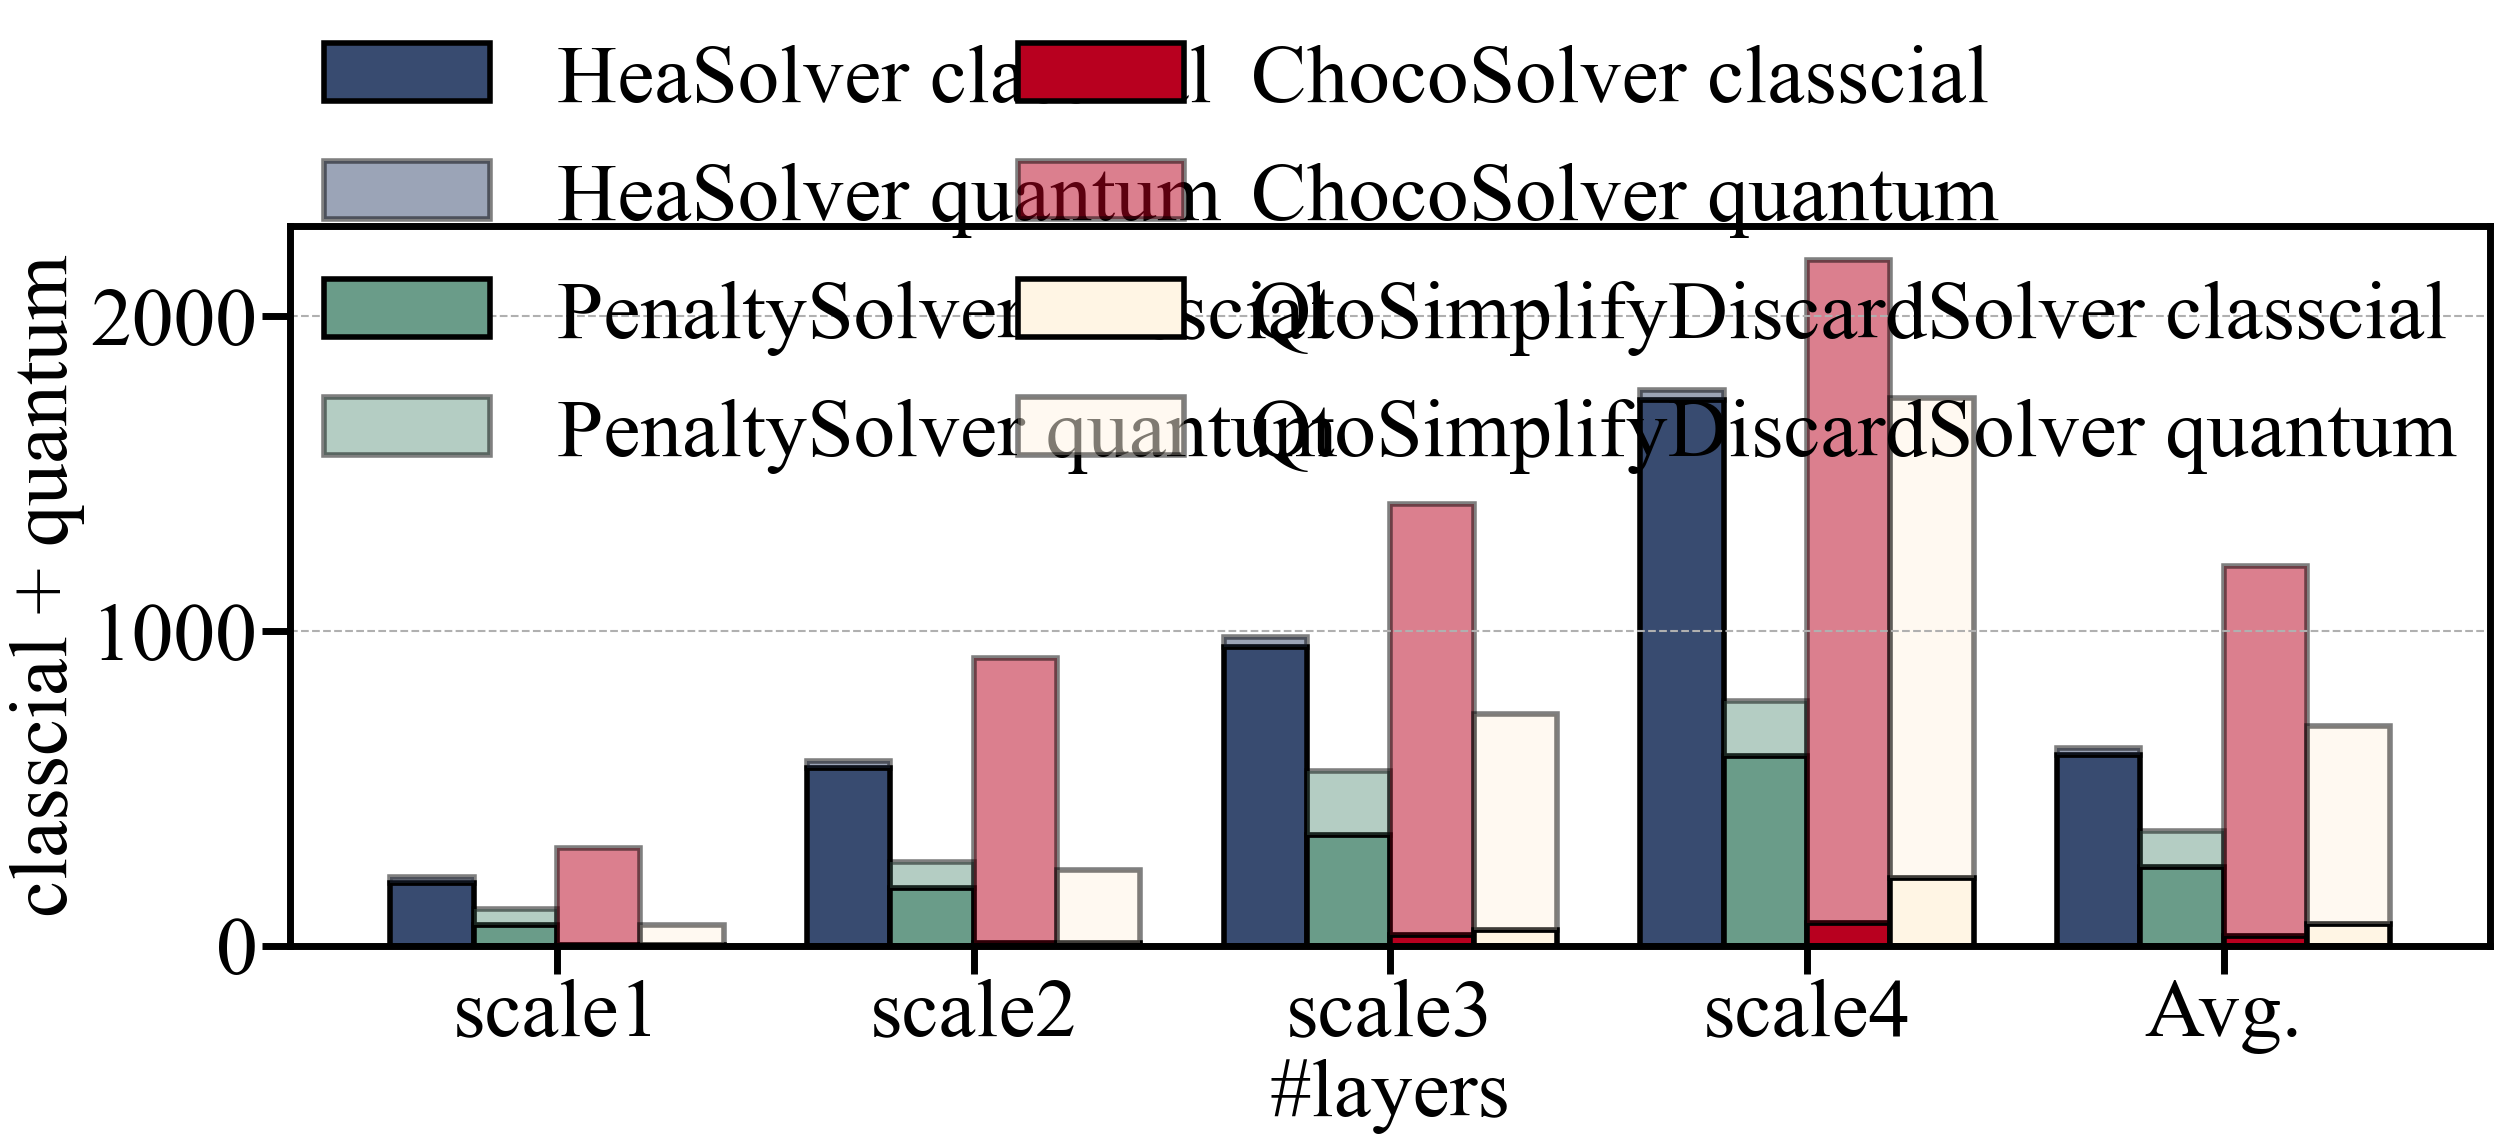

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

ax = plt.axes((0, 0, 1, 0.6))  
bar_width = 0.2
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4']  # Same color for each method
hatchs = ['','','','','//']

# Plotting loop for stacking bar chart with transparency for quantum
for idx, method in enumerate(['HeaSolver', 'PenaltySolver','ChocoSolver', 'QtoSimplifyDiscardSolver']):
    data = grouped_df[grouped_df.method == method]
    x = np.arange(len(data.pkid_group))
    
    # Extracting the 'classcial' and 'quantum' values for plotting
    y_classcial = data['classcial'].to_list()
    y_quantum = data['quantum'].to_list()

    # Plot 'classcial' as the base layer (opaque)
    ax.bar(x + idx * bar_width - (len(data.pkid_group) / 2 - 1) * bar_width, y_classcial, width=bar_width, color=colors[idx], label=f'{method} classcial', edgecolor="black", linewidth=4)

    # Plot 'quantum' on top of 'classcial' for the stacked effect (with transparency)
    ax.bar(x + idx * bar_width - (len(data.pkid_group) / 2 - 1) * bar_width, y_quantum, width=bar_width, bottom=y_classcial, color=colors[idx], alpha=0.5, label=f'{method} quantum', edgecolor="black", linewidth=4)

# Set grid
ax.grid(True, linestyle='--', linewidth=1.5, axis='y')

# Set the x-axis labels and title
plt.xlabel('#layers')
plt.ylabel('classcial + quantum')
plt.xticks(range(5), [f"scale{i + 1}" for i in range(4)] + ["Avg."])

# Customizing the legend
plt.legend(loc='upper left', ncol=2, frameon=False, bbox_to_anchor=(0, 1.1, 1, 0.2), mode="expand", borderaxespad=0)

# Save the figure
plt.savefig('classcial_and_quantum_stacked_bar_chart_with_transparency.svg', bbox_inches='tight')
plt.show()


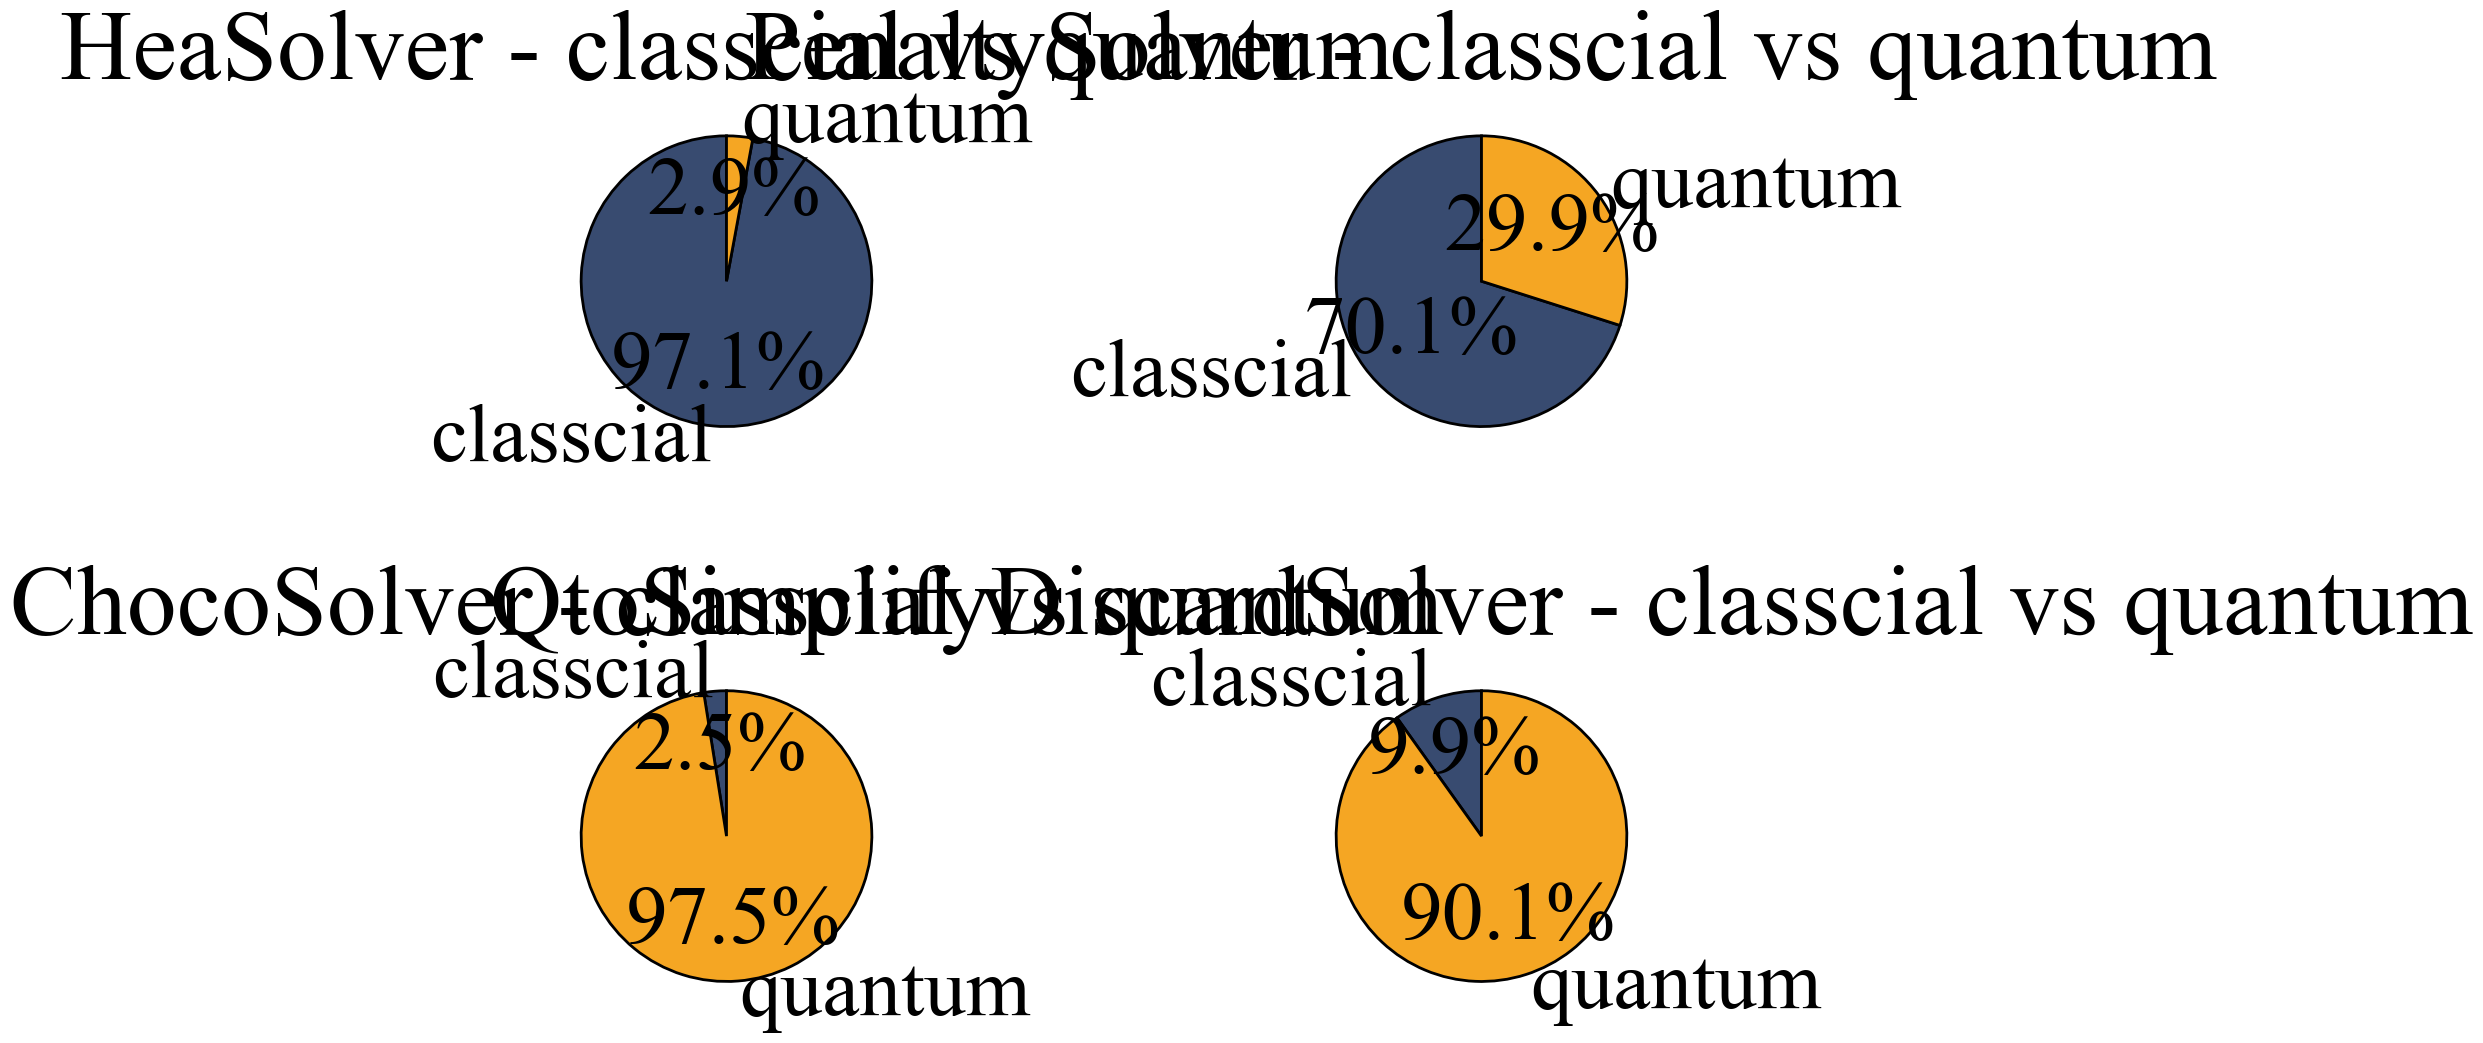

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 计算每个 method 的 classcial 和 quantum 的总和
methods = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']
classcial_quantum_sums = {}

for method in methods:
    data = grouped_df[(grouped_df.method == method) & (grouped_df.pkid_group != 5)]
    classcial_sum = data['classcial'].sum()
    quantum_sum = data['quantum'].sum()
    classcial_quantum_sums[method] = [classcial_sum, quantum_sum]

# 绘制饼图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, (method, values) in enumerate(classcial_quantum_sums.items()):
    # 将行列索引转化为一维的
    ax = axes[idx // 2, idx % 2]
    
    # 饼图数据和标签
    labels = ['classcial', 'quantum']
    sizes = values
    colors = ['#384B70', '#F5A623']
    
    # 绘制饼图
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 2})
    ax.set_title(f'{method} - classcial vs quantum')

# 调整布局
plt.tight_layout()
plt.show()
